# **Setup** and **Imports**
1.  Installing **nlp** package
2.  Importing libraries


---






In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


# **Importing** **and** **Undestanding** **the** **Data**


1.  Importing the Tweet Emotion dataset
2.  Creating train
3.  validation and test sets
4.  Extracting tweets and labels from the examples
5.  Getting an overview of the data









In [ ]:
import pandas as pd

train = pd.read_csv(
    "train.txt.zip",
    sep=";",
    names=["text","label"])

val = pd.read_csv(
    "val.txt",
    sep=";",
    names=["text","label"])

test = pd.read_csv(
    "test.txt",
    sep=";",
    names=["text","label"])

FileNotFoundError: [Errno 2] No such file or directory: 'train.txt.zip'

In [ ]:
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
def get_tweet(data):
    tweets = data["text"]
    labels = data["label"]
    return tweets, labels

In [ ]:
tweets, labels = get_tweet(train)
print(tweets[50]," : ", labels[50])

i need to feel the dough to make sure its just perfect  :  joy


In [ ]:
def data_description(data):
    shape = data.shape
    text_nulls = data["text"].isnull().sum()
    label_nulls = data["label"].isnull().sum()
    label_count = data["label"].value_counts()

    plt.hist(data["label"])
    plt.xlabel('emotions')
    plt.ylabel('Frequency')
    plt.title('data distribution')

    print("data shape : ",shape)
    print("null values in text field : ", text_nulls)
    print("null values in text field : ", label_nulls)
    print("label counts")
    print(label_count)
    plt.show()

Training data description
data shape :  (16000, 2)
null values in text field :  0
null values in text field :  0
label counts
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64


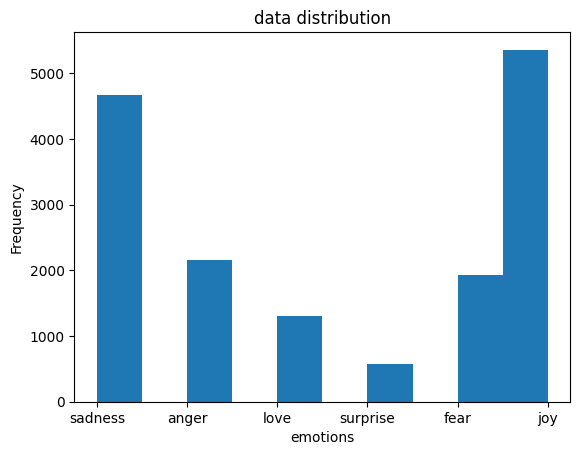

In [ ]:
from matplotlib import pyplot as plt
print("Training data description")
data_description(train)

Test data description
data shape :  (2000, 2)
null values in text field :  0
null values in text field :  0
label counts
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64


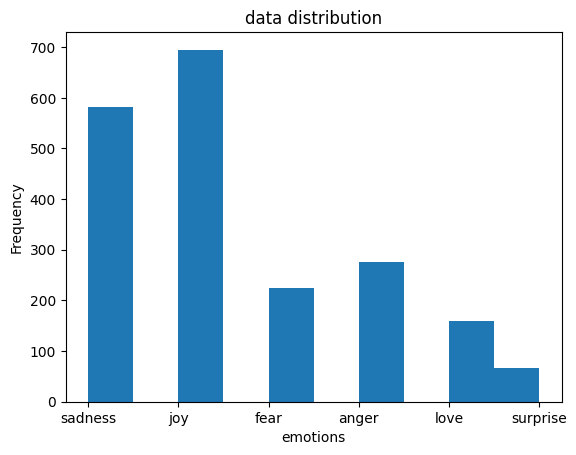

In [ ]:
print("Test data description")
data_description(test)

Validation data description
data shape :  (2000, 2)
null values in text field :  0
null values in text field :  0
label counts
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: label, dtype: int64


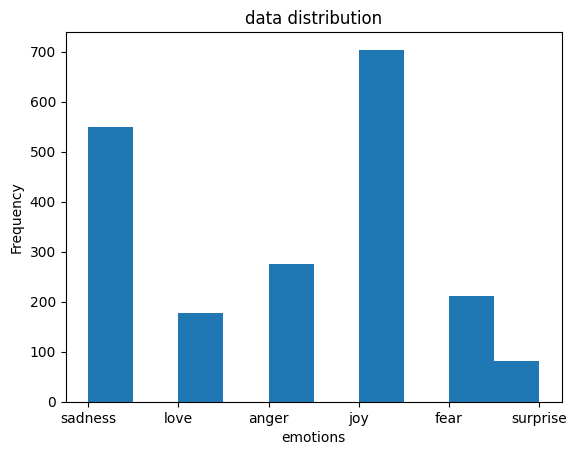

In [ ]:
print("Validation data description")
data_description(val)

# **Tokenization**
Tokenization is the process of breaking down a string of text into smaller pieces, called tokens. These tokens can be words, phrases, or symbols. Tokenization is a common step in natural language processing (NLP) tasks, such as text classification, sentiment analysis, and machine translation.

The **Tokenizer** class in the **tensorflow.keras.preprocessing.text** module in TensorFlow provides a convenient way to perform tokenization on text data. The class can be used to tokenize text into words or characters, and it also provides methods to map the tokens to integers, which can be used as input to neural networks.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer.fit_on_texts(tweets)

In [ ]:
print(tweets[50])
tokenizer.texts_to_sequences([tweets[50]])

i need to feel the dough to make sure its just perfect


[[2, 105, 5, 3, 6, 7419, 5, 80, 158, 79, 32, 356]]

# **Padding and Truncating Sequences**
In natural language processing (NLP), it is common to use sequences of words as input for models such as neural networks. However, these sequences often have different lengths, which can cause problems when training and using the model.

By **padding** or **truncating** the data to a fixed length, we ensure that all sequences have the same length and the model can process them efficiently and effectively. This is particularly important for models such as recurrent neural networks (RNNs) and convolutional neural networks (CNNs) which have a fixed input shape.


1.   Checking length of the tweets
2.   Creating padded sequences


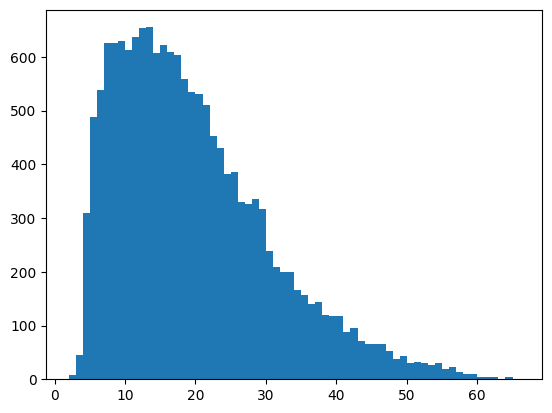

In [ ]:
lengths = [len(s.split()) for s in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
    return padded_sequences

In [ ]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[50]

array([   2,  105,    5,    3,    6, 7419,    5,   80,  158,   79,   32,
        356,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

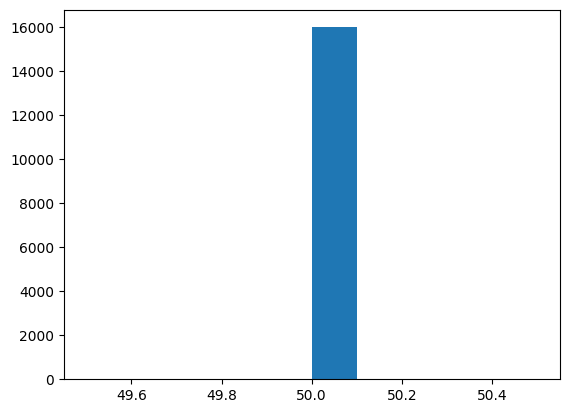

In [ ]:
lengths = [len(l) for l in padded_train_sequences]
plt.hist(lengths)
plt.show()

# **Preparing the Labels**


1.   Creating classes to index and index to classes
2.   dictionaries
3.   Converting text labels to numeric labels



In [ ]:
classes = set(labels)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [ ]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((value,key) for key, value in class_to_index.items())

In [ ]:
class_to_index

{'joy': 0, 'surprise': 1, 'fear': 2, 'anger': 3, 'sadness': 4, 'love': 5}

In [ ]:
index_to_class


{0: 'joy', 1: 'surprise', 2: 'fear', 3: 'anger', 4: 'sadness', 5: 'love'}

In [ ]:
import numpy as np
labels_to_ids = lambda labels : np.array([class_to_index.get(x) for x in labels])

In [ ]:
ids_to_labels = lambda ids : np.array([index_to_class.get(x) for x in ids])

In [ ]:
train_labels = labels_to_ids(labels)
train_labels[50]

0

#  **Creating & Compiling the Model**



In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Training the Model**
1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = labels_to_ids(val_labels)

In [ ]:
val_tweets[69], val_labels[69]

('i have no extra money im worried all of the time and i feel so beyond pathetic',
 4)

In [ ]:
m = model.fit(
    padded_train_sequences,
    train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 53s 93ms/step - loss: 1.3380 - accuracy: 0.4534 - val_loss: 0.8860 - val_accuracy: 0.6730
Epoch 2/20
500/500 [==============================] - 31s 61ms/step - loss: 0.6630 - accuracy: 0.7373 - val_loss: 0.6760 - val_accuracy: 0.7505
Epoch 3/20
500/500 [==============================] - 35s 70ms/step - loss: 0.4452 - accuracy: 0.8430 - val_loss: 0.5643 - val_accuracy: 0.8245
Epoch 4/20
500/500 [==============================] - 28s 55ms/step - loss: 0.3055 - accuracy: 0.9036 - val_loss: 0.5367 - val_accuracy: 0.8430
Epoch 5/20
500/500 [==============================] - 28s 55ms/step - loss: 0.2265 - accuracy: 0.9300 - val_loss: 0.4464 - val_accuracy: 0.8680
Epoch 6/20
500/500 [==============================] - 28s 56ms/step - loss: 0.1726 - accuracy: 0.9505 - val_loss: 0.4083 - val_accuracy: 0.8860
Epoch 7/20
500/500 [==============================] - 29s 58ms/step - loss: 0.1429 - accuracy: 0.9569 - val_loss: 0.3924 - val_accuracy:

# **Evaluating the Model**
1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

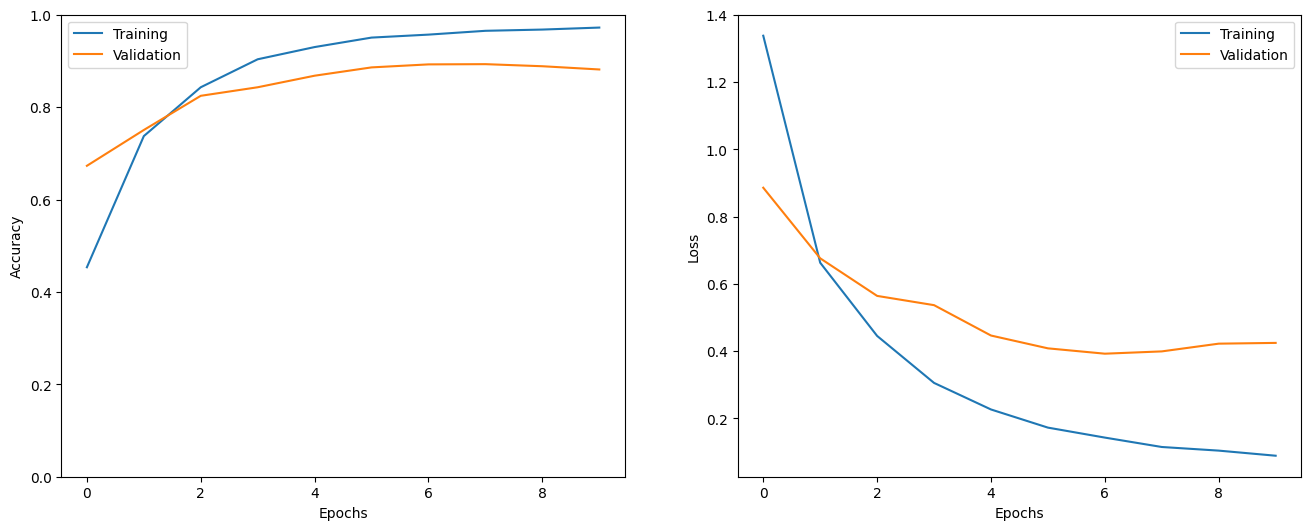

In [ ]:
show_history(m)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = labels_to_ids(test_labels)

In [ ]:
_ = model.evaluate(test_sequences, test_labels)

63/63 [==============================] - 1s 15ms/step - loss: 0.4564 - accuracy: 0.8715


In [ ]:
import random
for _ in range(5):
    i = random.randint(0, len(test_labels)-1)
    print("Tweet : ", test_tweets[i]," ==> label : ",index_to_class[test_labels[i]])
    p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
    pred_class = index_to_class[np.argmax(p).astype('uint8')]
    print("predicted label : ", pred_class)
    print("-----------------------")

Tweet :  i didnt feel at all deprived having it in my chai this morning  ==> label :  sadness
1/1 [==============================] - 2s 2s/step
predicted label :  sadness
-----------------------
Tweet :  i feel like i am less of a woman less of a person less valuable because im not married and not dating  ==> label :  joy
1/1 [==============================] - 0s 30ms/step
predicted label :  joy
-----------------------
Tweet :  i am feeling a lot more positive about the future of the virtual birth unit and simulation in midwifery education  ==> label :  joy
1/1 [==============================] - 0s 28ms/step
predicted label :  joy
-----------------------
Tweet :  i feel shocked that you d stoup to destinys child b  ==> label :  surprise
1/1 [==============================] - 0s 28ms/step
predicted label :  surprise
-----------------------
Tweet :  i cant tell you how many times in the four months we have been seeing each other seriously that we have had to have serious emotional talks 

In [ ]:
predict_x=model.predict(test_sequences)
classes_x=np.argmax(predict_x,axis=1)

63/63 [==============================] - 1s 16ms/step


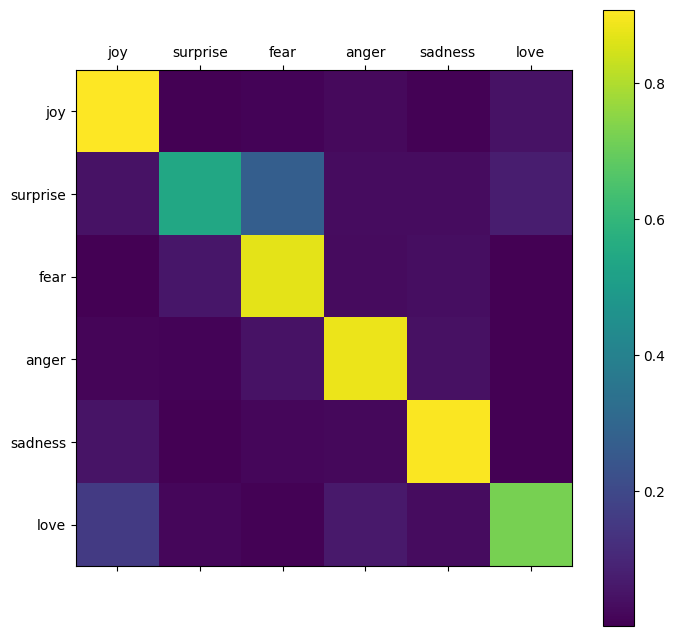

In [ ]:
show_confusion_matrix(test_labels, classes_x, list(classes))